In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os

import cv2
import keras
from keras import layers, models
# from keras.models import Model
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [16]:
import cv2
import os

categories = ['Neem Leaf', 'Mint Leaf', 'Curry Leaf', 'Arjun Leaf', 'Marsh Pennywort Leaf']
dir_path = './Augmented Images/Augmented Images/'
dataset = []
SIZE = 512

def load_images(dir_path, category):
    count = 0
    path = os.path.join(dir_path, category)
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image_array is not None:
            new_array = cv2.resize(image_array, (SIZE, SIZE))
            dataset.append([new_array, category])
            count += 1
        else:
            print(f"Error: Unable to read image '{image_path}'")
    return count

total_count = 0
for category in categories:
    count = load_images(dir_path, category)
    print(f"Number of {category} images: {count}")
    total_count += count

print(f"Total number of images: {total_count}")


Number of Neem Leaf images: 490
Number of Mint Leaf images: 1540
Number of Curry Leaf images: 1155
Number of Arjun Leaf images: 1540
Number of Marsh Pennywort Leaf images: 1470
Total number of images: 6195


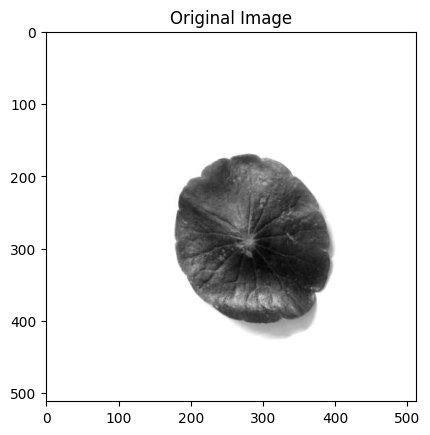

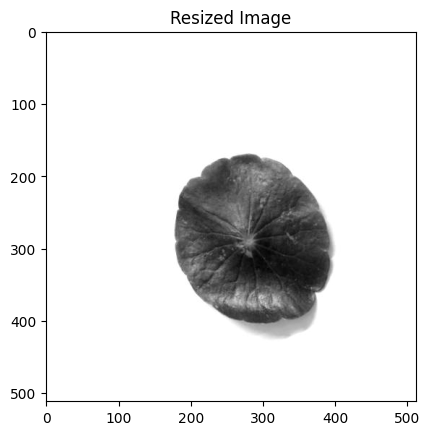

In [17]:
import matplotlib.pyplot as plt
last_image = dataset[-1][0]
last_resized_image = cv2.resize(last_image, (SIZE, SIZE))

plt.imshow(last_image, cmap="gray")
plt.title("Original Image")
plt.show()

plt.imshow(last_resized_image, cmap="gray")
plt.title("Resized Image")
plt.show()

In [18]:
import numpy as np

x = []
y = []

for feature, label in dataset:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

x = x.reshape(-1, SIZE, SIZE, 1)

# x = x / 255.0
y = np.array(y)
print("Shape of x:", x.shape)


Shape of x: (6195, 512, 512, 1)


In [19]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (4956, 512, 512, 1)
Shape of X_test: (1239, 512, 512, 1)
Shape of Y_train: (4956,)
Shape of Y_test: (1239,)


In [20]:
y_train = []
for y in Y_train:
  if y == 'Arjun Leaf':
    y_train.append(0)
  elif y == 'Curry Leaf':
    y_train.append(1)
  elif y == 'Marsh Pennywort Leaf':
    y_train.append(2)
  elif y == 'Mint Leaf':
    y_train.append(3)
  elif y == 'Neem Leaf':
    y_train.append(4)
# y_train[:5]
y_train = np.array(y_train)

# CNN implementation:

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape =(512,512,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5,activation='sigmoid')
])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(512,512,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(6,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=3)


Epoch 1/3
155/155 [==============================] - 499s 3s/step - loss: 116.8369 - accuracy: 0.3832
Epoch 2/3
155/155 [==============================] - 6085s 39s/step - loss: 1.4898 - accuracy: 0.3376
Epoch 3/3
155/155 [==============================] - 514s 3s/step - loss: 1.0179 - accuracy: 0.6152


In [38]:
y_test = []
for y in Y_test:
  if y == 'Arjun Leaf':
    y_test.append(0)
  elif y == 'Curry Leaf':
    y_test.append(1)
  elif y == 'Marsh Pennywort Leaf':
    y_test.append(2)
  elif y == 'Mint Leaf':
    y_test.append(3)
  elif y == 'Neem Leaf':
    y_test.append(4)
# y_test[:5]
y_test = np.array(y_test)

In [27]:
# cnn.evaluate(X_test, y_test)
y_predicted = cnn.predict(X_test)

39/39 [==============================] - 27s 607ms/step


In [35]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred[:10]

[2, 2, 1, 2, 2, 2, 3, 0, 0, 3]

In [41]:
correct = 0
incorrect = 0
for i in range(len(y_test)):
    # print(y_test[i], end="")
    # print(y_pred[i])
    if(y_test[i]==y_pred[i]):
        correct+=1
    else:
        incorrect+=1
accuracy = correct/(correct + incorrect)
print(correct)
print(incorrect)
accuracy

516
723


0.41646489104116224